# 1. Implementation of linear regression 
## 1.1. Analytical approach

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.datasets import make_regression
import time

np.set_printoptions(precision=3) # Setting global precision (only for print)

def linear_regression_analytical(X: np.ndarray, y: np.ndarray, plot_title: str = None):
    """
    Solve linear regression using analytical approach
    
    Args: 
        X: Matrix with shape (n_features, n_samples)
        y: Target values with shape (n_samples)
        plot_title: Title for visualization 

    Returns:
        Optimal weight vector
    """
    cumulative_time = 0

    for _ in range(100):
        start_time = time.time() # start of counting time
        w = np.linalg.inv(X @ X.T) @ X @ y # vector of weights, theta
        y_pred = np.dot(X.T,w) # alternative way for multiplying matrix
        end_time = time.time() # End of counting time 
        elapsed_time = end_time - start_time
        cumulative_time += elapsed_time
    
    average_time = cumulative_time / 100

    plt.scatter(X[1,:], y, label = "Actual values")
    plt.scatter(X[1,:], y_pred, label = "Predicted values", color = "red")
    plt.title(f"{plot_title}")
    plt.legend()
    plt.show()
    
    print(f"Operation time for analytical approach for linear regression: {average_time:.5f}s")
    print(f"Finded vector of weights is equal: {w}")

## 1.2. Numerical approach

In [44]:
def linear_regression_numerical(X: np.ndarray, y: np.ndarray, plot_title: str = None):
    """
    Solve linear regression using numerical optimization.
    
    Args: 
        X: Matrix with shape (n_features, n_samples)
        y: Target values with shape (n_samples)
        plot_title: Title for visualization 

    Returns:
        Optimal weight vector
        
    Notes:
        Vector of weight should be initializated with standard normal distribution not with zeros
    """
    random_generator = np.random.default_rng()
    cumulative_time = 0
    
    for _ in range(100):
        start_time = time.time() # start counting time
        w_begin = random_generator.standard_normal((X.shape[0])) 
        result = minimize(loss_function, w_begin, args=(X,y), method='Powell') 
        """
        The minimize function finds the minimum of a function that takes a parameter vector as arguments.
        In this case, we're minimizing the mean squared error function. w_begin contains the initial values of the parameter vector where optimization begins,
        args passes additional arguments to the loss function, and the Powell method is one of the gradient-free optimization techniques.
        The algorithm iteratively adjusts the weight values to minimize the loss function.
        """
        y_pred = np.dot(X.T, result.x)
        end_time = time.time()
        elapsed_time = end_time - start_time
        cumulative_time += elapsed_time
    
    average_time = cumulative_time / 100

    plt.scatter(X[1,:], y, label = "Actual values")
    plt.scatter(X[1,:], y_pred, label = "Predicted values", color = "red")
    plt.title(f"{plot_title}")
    plt.legend()
    plt.show()
    
    print(f"Operation time for numerical approach for linear regression: {average_time:.5f}s")
    print(f"Finded vector of weights is equal::{result.x}")


def loss_function(w: np.ndarray, X: np.ndarray, y: np.ndarray) -> float:
    """
    Computes mean squared error loss
    
    Args: 
        w: Weight vector
        X: Design matrix
        y: Target values

    Returns: 
        Mean squared error
    """
    amount_of_samples = len(y)
    loss = y - (X.T @ w) # computing difference between acutal value and predicted
    loss_function = (1/amount_of_samples) * (loss.T @ loss)
    # L(w) means loss function in relation with weight vector, here is like MSE
    return loss_function

## 1.3. Compare of analytical and numerical approach 

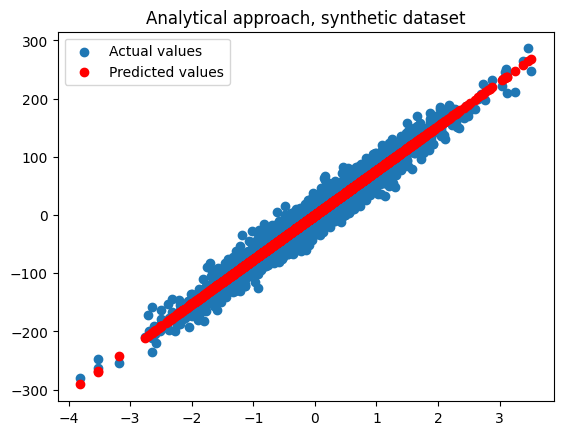

Operation time for analytical approach for linear regression: 0.00004s
Finded vector of weights is equal: [-0.183 76.351]





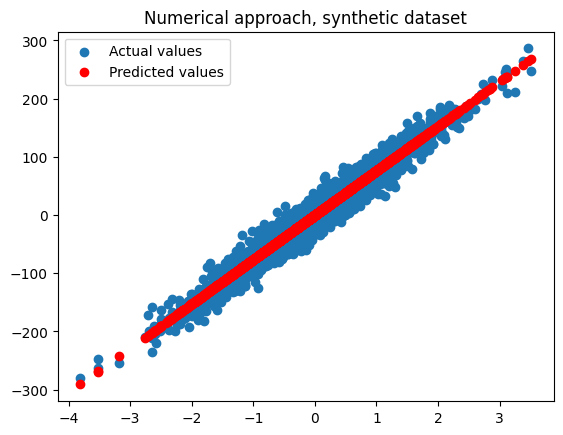

Operation time for numerical approach for linear regression: 0.00218s
Finded vector of weights is equal::[-0.183 76.351]


In [45]:
x, y  = make_regression(n_samples=2587, n_features=1, noise=16, random_state=254687)
X = np.array([np.ones(shape=x.shape[0]), x.flatten()]) 
"""
Expanded data matrix (containing a row of '1's needed to account for the bias term). In other words:
np.ones(shape=x.shape[0]) creates a vector of ones with length equal to the number of samples in X, where x.shape[0] gets exactly the sample count
x.flatten() transforms the x matrix with shape (n_samples x 1) into a one-dimensional vector, effectively "flattening" the array
"""

linear_regression_analytical(X, y, "Analytical approach, synthetic dataset")
print("\n\n")
linear_regression_numerical(X, y, "Numerical approach, synthetic dataset")   

**Conclusion**: For this size of dataset analytical version is faster than numerical 

# 2. Linear Regression example using Flappy Bird

## 2.1. Uploading dataset: minimal, optimal, complete

In [46]:
# map makes that every element of list is converted on float
minimal_set = np.array([list(map(float, line.strip().split(','))) for line in open('zbiorminimalny.csv', 'r')])
optimal_set = np.array([list(map(float, line.strip().split(','))) for line in open('zbioroptymalny.csv', 'r')])
complete_set = np.array([list(map(float, line.strip().split(','))) for line in open('zbiorpelny.csv', 'r')])

## 2.2. Analytical approach using polynomials

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


def linear_regression_polynomial(dataset: np.ndarray, plot_title: str):
    
    x_analytics = dataset[:,0]
    y_analytics = dataset[:,1]

    x_max_analytics = x_analytics.max()
    y_max_analytics = y_analytics.max()

    x_min_analytics = x_analytics.min()
    y_min_analytics = y_analytics.min()

    # Normalize samples
    x_norm_analytics = (x_analytics - x_min_analytics) / (x_max_analytics - x_min_analytics)
    y_norm_analytics = (y_analytics - y_min_analytics) / (y_max_analytics - y_min_analytics)

    # Polynomial of 9 degree
    polynomial_features_9 = PolynomialFeatures(degree=9)

    cumulative_time = 0
    for _ in range(100):
        start_time = time.time()
        X_9_analytics = polynomial_features_9.fit_transform(x_norm_analytics.reshape(-1,1))
        w_9 = np.linalg.inv(X_9_analytics.T @  X_9_analytics) @ X_9_analytics.T @ y_norm_analytics
        y_pred_9_analytics = np.dot(X_9_analytics, w_9)
        end_time = time.time()
        elapsed_time = end_time - start_time
        cumulative_time += elapsed_time
    
    average_time_poly_9 = cumulative_time / 100
    
    # Polynomial of 21 degree
    polynomial_features_21 = PolynomialFeatures(degree=21)

    cumulative_time = 0
    for _ in range(100):
        start_time = time.time()
        X_21_analytics = polynomial_features_21.fit_transform(x_norm_analytics.reshape(-1,1))
        w_21 = np.linalg.inv(X_21_analytics.T @  X_21_analytics) @ X_21_analytics.T @ y_norm_analytics
        y_pred_21_analytics = np.dot(X_21_analytics, w_21)
        end_time = time.time()
        elapsed_time = end_time - start_time
        cumulative_time += elapsed_time

    average_time_poly_21 = cumulative_time / 100
    
    # Computing MSE
    mse_9_analytics = mean_squared_error(y_norm_analytics, y_pred_9_analytics) 
    mse_21_analytics = mean_squared_error(y_norm_analytics, y_pred_21_analytics)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    ax1.scatter(X_9_analytics[:,1], y_norm_analytics, label = "Actual values")
    ax1.scatter(X_9_analytics[:,1], y_pred_9_analytics, label = "Predicted values")
    ax1.set_title(f"Linear regression approach analytical with polynomial of 9 degree for dataset {plot_title}")
    ax1.legend()
    
    ax2.scatter(X_21_analytics[:,1], y_norm_analytics, label = "Actual values")
    ax2.scatter(X_21_analytics[:,1], y_pred_21_analytics, label = "Predicted values")
    ax2.set_title(f"Linear regression approach analytical with polynomial of 21 degree for dataset {plot_title}")
    ax2.legend()
    plt.tight_layout()
    plt.show()

    print(f"Operation time for analytica approach using polynomial of 9 degree for linear regression:{average_time_poly_9}s")
    print(f"Operation time for analytica approach using polynomial of 21 degree for linear regression:{average_time_poly_21}s")
    print(f"MSE for Linear regression approach analytical with polynomial of 9 degree: {mse_9_analytics}")
    print(f"MSE for Linear regression approach analytical with polynomial of 21 degree: {mse_21_analytics}")

## 2.3. Linear Regression from sklearn

In [48]:
def sklearn_linear_regression(dataset, dataset_name):

    x = dataset[:,0].reshape(-1,1)
    y = dataset[:,1]

    x_max = x.max()
    y_max = y.max()

    x_min = x.min()
    y_min = y.min()

    # Normalize samples
    x_norm = (x - x_min) / (x_max - x_min) 
    y_norm = (y - y_min) / (y_max - y_min)

    # Creating new models of linear regression
    model_9 = LinearRegression()
    model_21 = LinearRegression()
    
    # Polynomial of 9 degree
    polynomial_features_9 = PolynomialFeatures(degree=9)

    cumulative_time = 0

    for _ in range(100):
        start_time = time.time() 
        X_9 = polynomial_features_9.fit_transform(x_norm)
        model_9.fit(X_9, y_norm) 
        y_pred_9 = model_9.predict(X_9)
        end_time = time.time()
        elapsed_time = end_time - start_time
        cumulative_time += elapsed_time
    
    average_time_poly_9 = cumulative_time / 100

    # Polynomial of 21 degree
    polynomial_features_21 = PolynomialFeatures(degree=21)

    cumulative_time = 0

    for _ in range(100):
        start_time = time.time()
        X_21 = polynomial_features_21.fit_transform(x_norm)
        model_21.fit(X_21, y_norm)
        y_pred_21 = model_21.predict(X_21)
        end_time = time.time()
        elapsed_time = end_time - start_time
        cumulative_time += elapsed_time
    
    average_time_poly_21 = cumulative_time / 100

    # MSE computing
    mse_9 = mean_squared_error(y_norm, y_pred_9) 
    mse_21 = mean_squared_error(y_norm, y_pred_21)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

    ax1.scatter(x_norm, y_norm, label = "Actual values")
    ax2.scatter(x_norm, y_norm, label = "Actual values")
    ax1.scatter(x_norm, y_pred_9, color = "red", label = "Polynomial regression of 9 degree")
    ax2.scatter(x_norm, y_pred_21, color = "green", label = "Polynomial regression of 21 degree")
    ax1.set_title(f"Linear regression from scikit learn using polynomial 9 degree for dataset: {dataset_name}")
    ax2.set_title(f"Linear regression from scikit learn using polynomial 21 degree for dataset: {dataset_name}")
    ax1.legend()
    ax2.legend()
    plt.tight_layout()
    plt.show()

    print(f"Operation time for linear regression from scikit learn using polynomial of 9 degree:{average_time_poly_9}s")
    print(f"Operation time for linear regression from scikit learn using polynomial of 21 degree:{average_time_poly_21}s")
    print(f"MSE for regression with polunomial of 9 degree is equal: {mse_9}")
    print(f"MSE for regression with polunomial of 21 degree is equal: {mse_21}")

## 2.4. Compare of polynomial regression analytical and sklearn

### 2.4.1. Minimal dataset

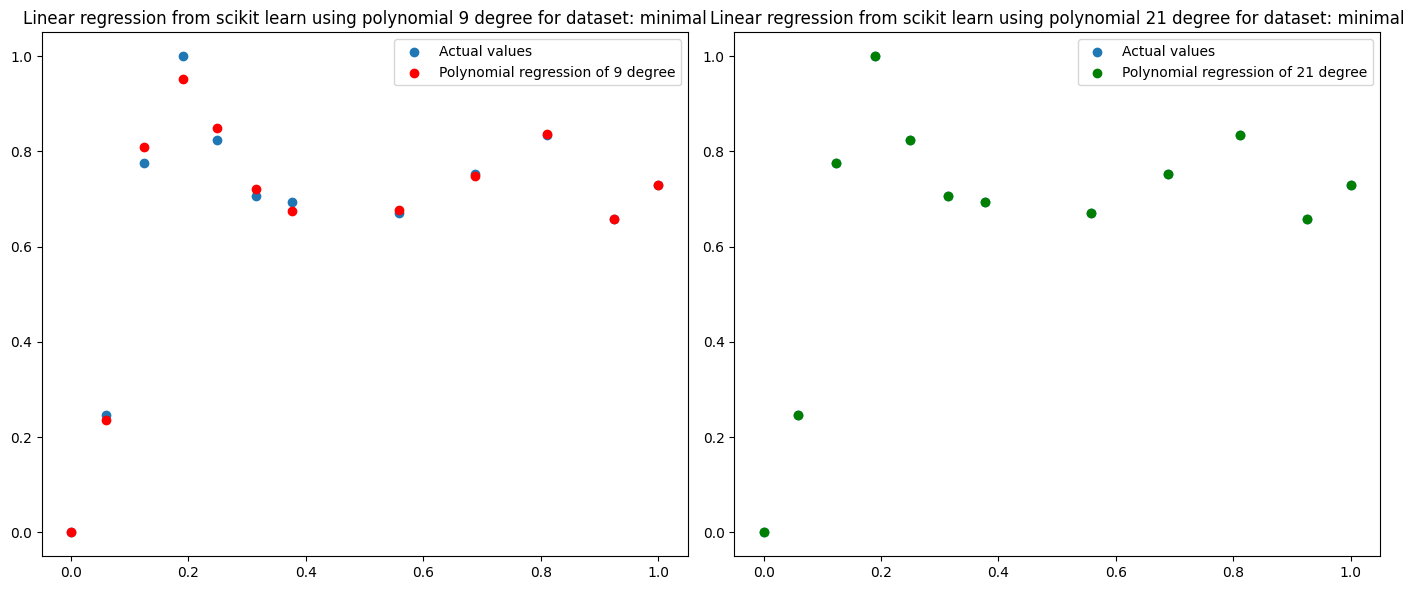

Operation time for linear regression from scikit learn using polynomial of 9 degree:0.0007609891891479493s
Operation time for linear regression from scikit learn using polynomial of 21 degree:0.000687098503112793s
MSE for regression with polunomial of 9 degree is equal: 0.0003917072833883785
MSE for regression with polunomial of 21 degree is equal: 1.803464167284223e-22


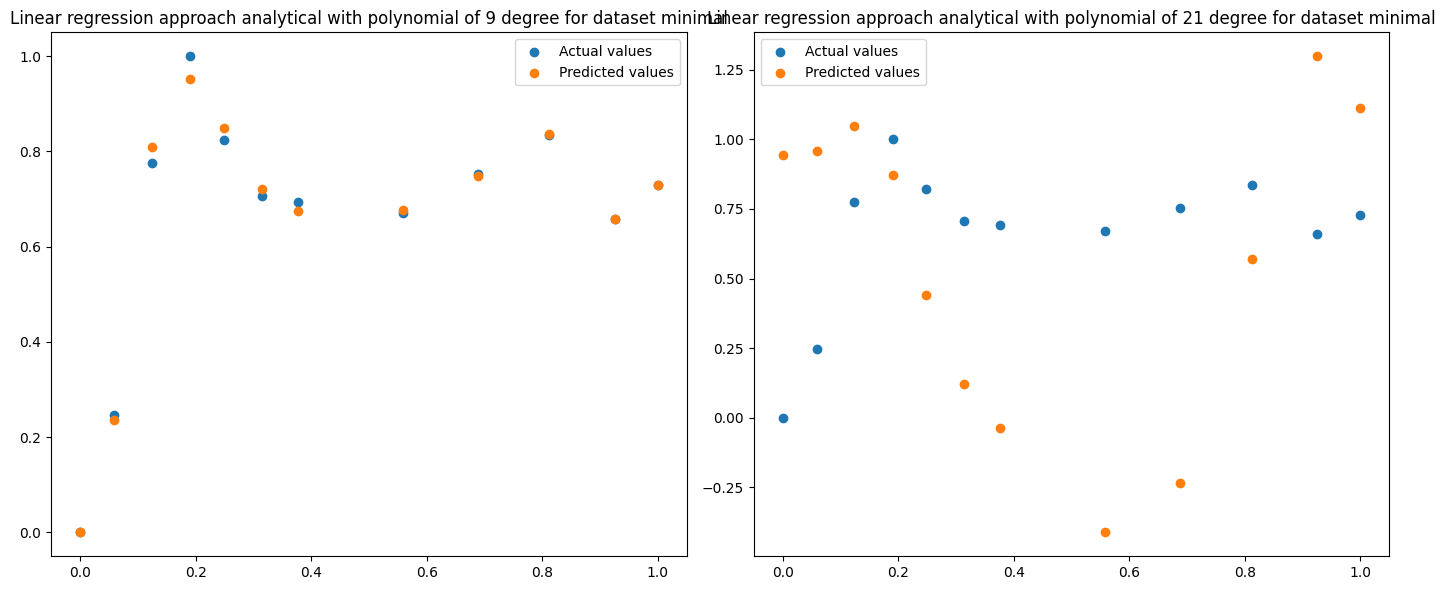

Operation time for analytica approach using polynomial of 9 degree for linear regression:0.0002514338493347168s
Operation time for analytica approach using polynomial of 21 degree for linear regression:0.00028559207916259763s
MSE for Linear regression approach analytical with polynomial of 9 degree: 0.00039170802762717355
MSE for Linear regression approach analytical with polynomial of 21 degree: 0.4402435723199345


In [49]:
sklearn_linear_regression(minimal_set, "minimal")
linear_regression_polynomial(minimal_set, "minimal")

**Conclusion** For minimal dataset model from sklearn and alaytical approach have comparable results except analytical approach with 21 degree polynomial where appeared overfitting.

### 2.4.2. Optimal dataset

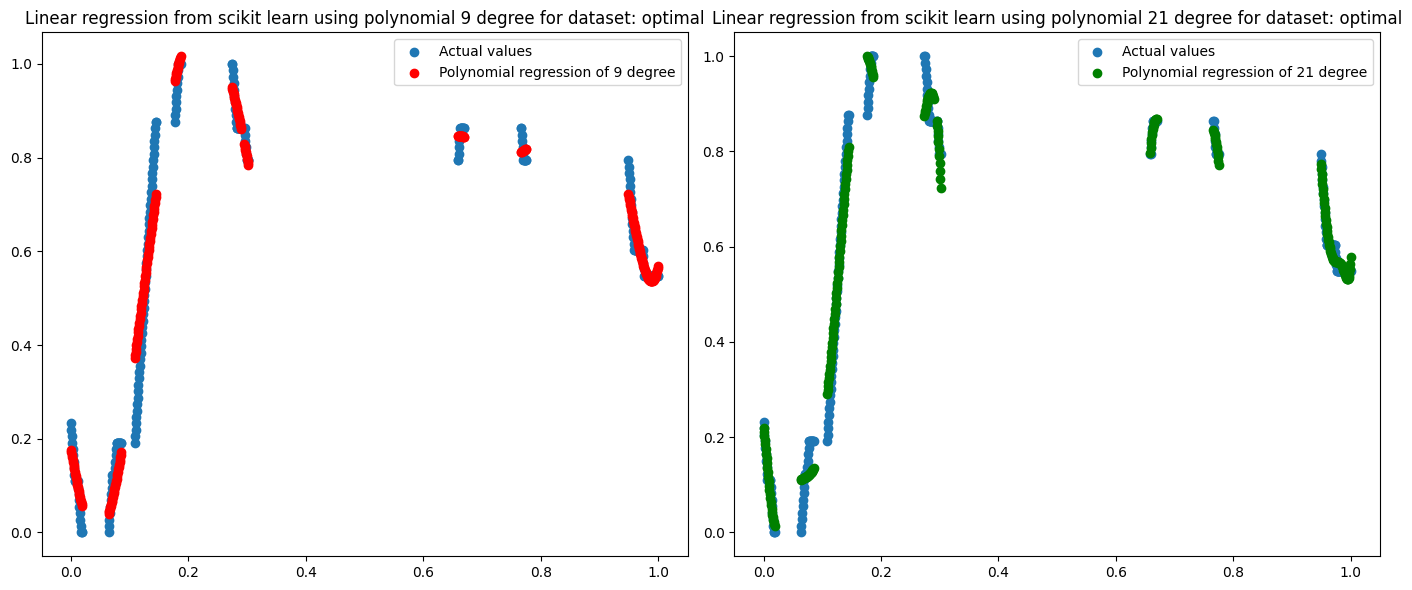

Operation time for linear regression from scikit learn using polynomial of 9 degree:0.0007333946228027344s
Operation time for linear regression from scikit learn using polynomial of 21 degree:0.0007877922058105468s
MSE for regression with polunomial of 9 degree is equal: 0.0028296783881606676
MSE for regression with polunomial of 21 degree is equal: 0.0015806179657675303


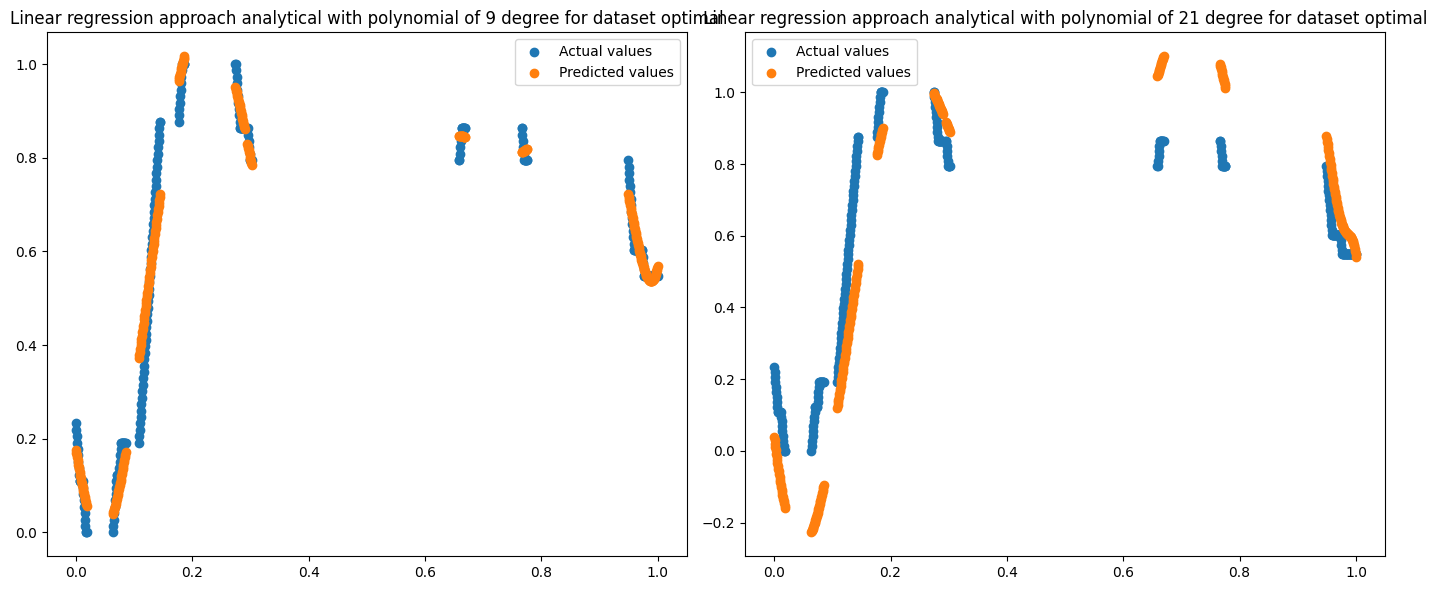

Operation time for analytica approach using polynomial of 9 degree for linear regression:0.0002669692039489746s
Operation time for analytica approach using polynomial of 21 degree for linear regression:0.0003155922889709473s
MSE for Linear regression approach analytical with polynomial of 9 degree: 0.002829697272320042
MSE for Linear regression approach analytical with polynomial of 21 degree: 0.034809964469802376


In [50]:
sklearn_linear_regression(optimal_set, "optimal")
linear_regression_polynomial(optimal_set, "optimal")

**Conclusion** For 9 degree polynomial still we have comparable results, even analytical approach is faster, but for 21 degree polynomial it has higher MSE.

### 2.4.3. Complete dataset

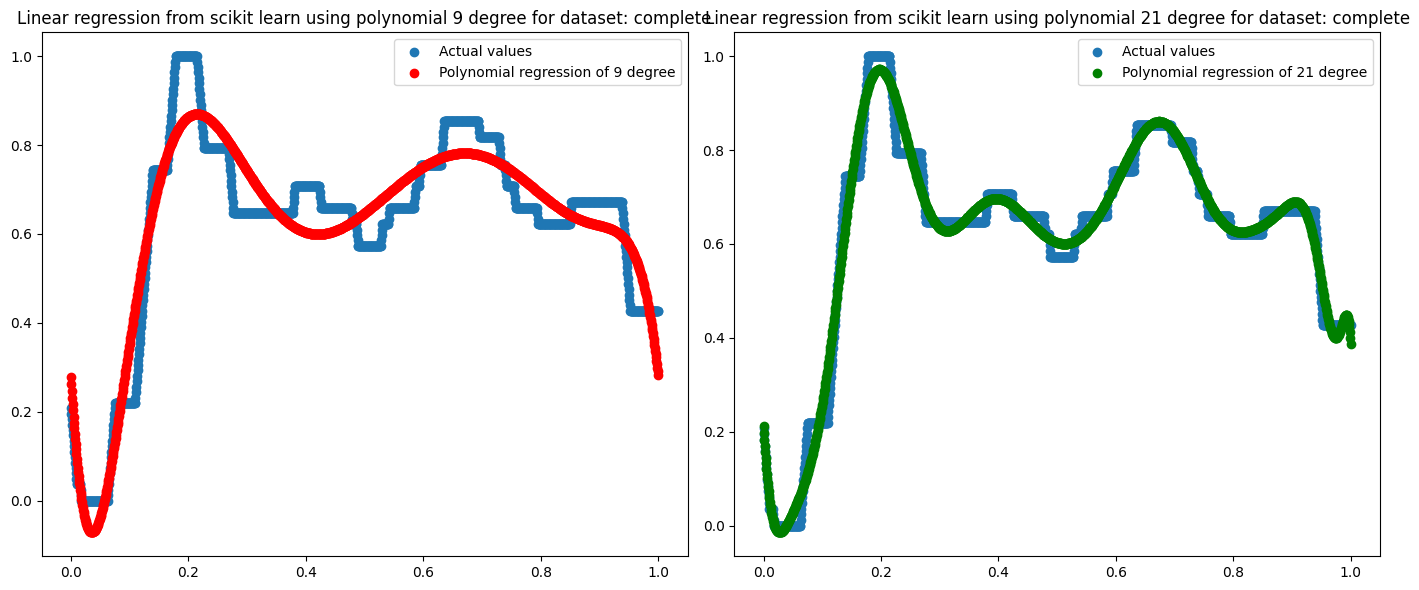

Operation time for linear regression from scikit learn using polynomial of 9 degree:0.0008970141410827637s
Operation time for linear regression from scikit learn using polynomial of 21 degree:0.0015373706817626953s
MSE for regression with polunomial of 9 degree is equal: 0.0050712146184949585
MSE for regression with polunomial of 21 degree is equal: 0.0010402593297543902


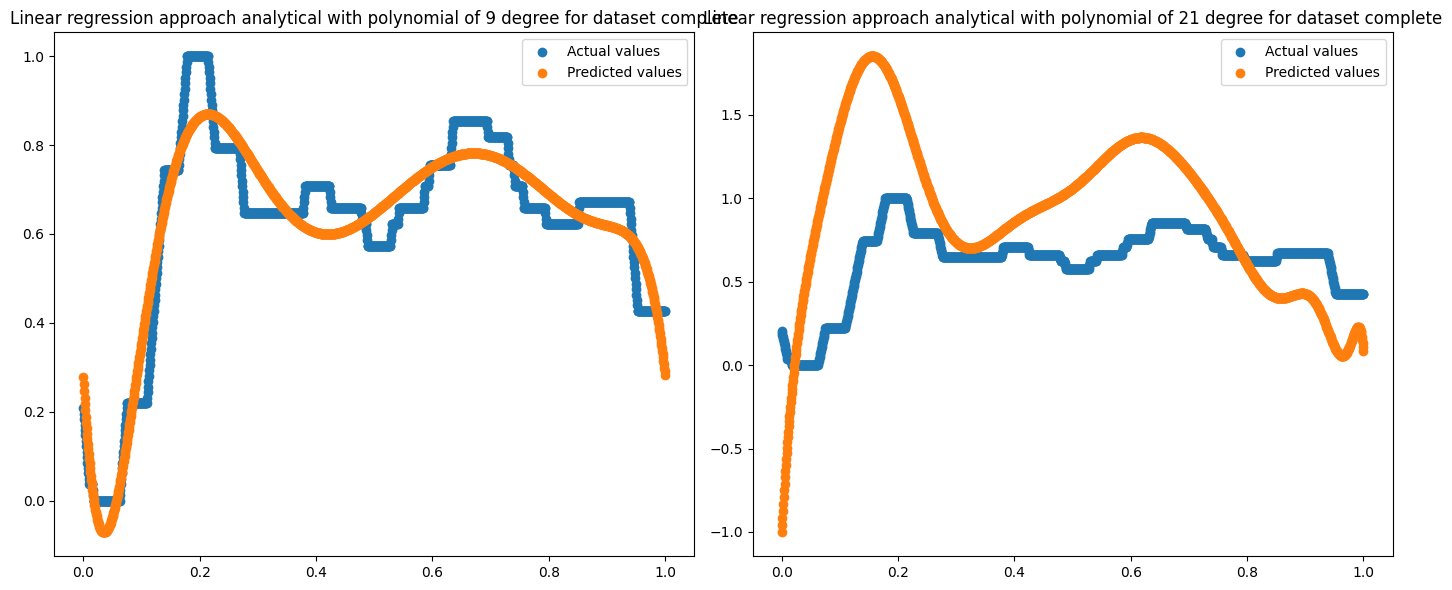

Operation time for analytica approach using polynomial of 9 degree for linear regression:0.0003243565559387207s
Operation time for analytica approach using polynomial of 21 degree for linear regression:0.00047110557556152345s
MSE for Linear regression approach analytical with polynomial of 9 degree: 0.0050712147011000705
MSE for Linear regression approach analytical with polynomial of 21 degree: 0.2728482618748448


In [51]:
sklearn_linear_regression(complete_set, "complete")
linear_regression_polynomial(complete_set, "complete")

**Conclusions** Analytical approach is faster in general. For higher degree polynomial occures overfitting. The best results are for scikit learn model using 21 degree polynomial. 

# 3. Ridge Regression

Ridge Regression is a linear regression method that addresses the problem of overfitting (excessive model fitting to training data). It works by adding a penalty term to the cost function (loss function), proportional to the squared L2 norm of the coefficients.  

Ridge Regression is a special case of Tikhonov regularization, where the penalty term is the L2 norm squared (sum of squared coefficients).

## 3.1. Ridge Regression Analytical

In [52]:
from sklearn.linear_model import Ridge

def RidgeRegressionOwn (dataset, dataset_name):
    
    polynomial_features_16 = PolynomialFeatures(degree = 16)
    
    x = dataset[:,0] 
    y = dataset[:,1]
    x_max, x_min = x.max(), x.min()
    y_max, y_min = y.max(), y.min()

    # Normalization 
    x_norm = (x-x_min) / (x_max-x_min) 
    y_norm = (y-y_min) / (y_max-y_min)

    # Coefficient of regularization  
    alpha = 0.001 

    cumulative_time = 0

    for _ in range(100):
        start_time = time.time()
        X_16 = polynomial_features_16.fit_transform(x_norm.reshape(-1,1))
        w_16 = np.linalg.inv(X_16.T @ X_16 + alpha*np.eye(X_16.shape[1])) @ X_16.T @ y_norm
        y_16_pred = X_16 @ w_16
        end_time = time.time()
        elapsed_time = end_time - start_time
        cumulative_time += elapsed_time

    average_time_analytical_ridge = cumulative_time / 100

    mse = mean_squared_error(y_norm, y_16_pred)
    
    plt.scatter(x_norm, y_norm, label = "Actual values")
    plt.scatter(x_norm, y_16_pred, label = "Predicted values")
    plt.title(f"Analytical approach with Tichonov regularization for dataset:{dataset_name}")
    plt.legend()
    plt.show()
    print(f"Operation time for ridge regression using analytical approach:{average_time_analytical_ridge:.5f}")
    print(f"MSE for ridge regression using analytical approach: {mse}")

## 3.2. Ridge Regression Scikit Learn Model

In [53]:
def RidgeRegression(dataset, dataset_name):
  
    polynomial_features_16 = PolynomialFeatures(degree = 16)
    model_16 = LinearRegression()

    x = dataset[:,0]
    y = dataset[:,1]
    x_max, x_min = x.max(), x.min()
    y_max, y_min = y.max(), y.min()

    #Normalization
    x_norm = (x-x_min) / (x_max-x_min)
    y_norm = (y-y_min) / (y_max-y_min)

    cumulative_time = 0

    for _ in range(100):
        start_time = time.time()
        X_16_ridge = polynomial_features_16.fit_transform(x_norm.reshape(-1,1), Ridge(alpha=1e-3))
        model_16.fit(X_16_ridge, y_norm)
        y_pred_16 = model_16.predict(X_16_ridge)
        end_time = time.time()
        elapsed_time = end_time - start_time
        cumulative_time += elapsed_time

    average_time_scklearn_ridge = cumulative_time / 100

    mse = mean_squared_error(y_norm, y_pred_16)

    plt.scatter(x_norm, y_norm, label = "Actual values")
    plt.scatter(x_norm, y_pred_16, label = "Predicted values")
    plt.title(f"Ridge regression for dataset: {dataset_name} using sklearn")
    plt.legend()
    plt.show()
    print(f"Operation time for ridge regression using sklearn:{average_time_scklearn_ridge:.5f}")
    print(f"MSE for ridge regression using sklearn: {mse}")

## 3.3. Compare of ridge regression models

### 3.3.1. Minimal dataset

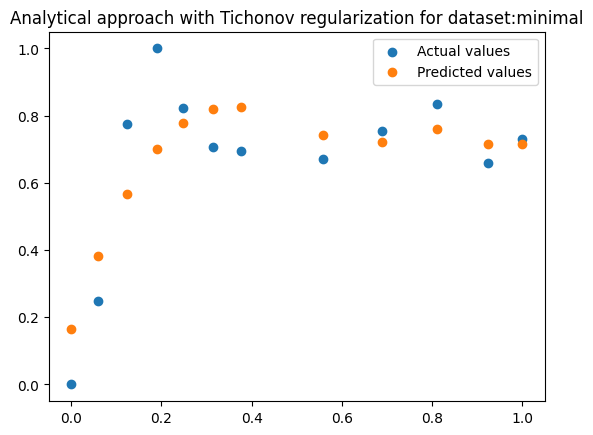

Operation time for ridge regression using analytical approach:0.00029
MSE for ridge regression using analytical approach: 0.01887809357058225


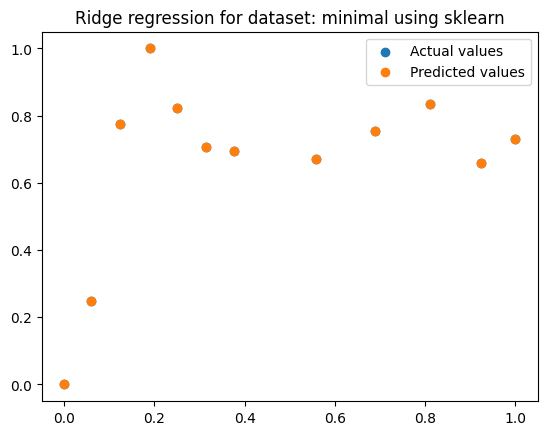

Operation time for ridge regression using sklearn:0.00070
MSE for ridge regression using sklearn: 8.389119646483035e-22


In [54]:
RidgeRegressionOwn(minimal_set, "minimal")
RidgeRegression(minimal_set, "minimal")

**Conclusions** Analytical approach is faster. It has higher error than sklearn model. There is no overfitting for analytical approach as it used to be.  

### 3.3.2. Optimal dataset

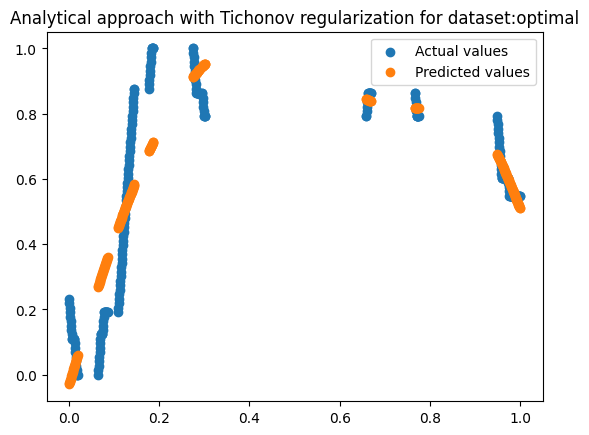

Operation time for ridge regression using analytical approach:0.00033
MSE for ridge regression using analytical approach: 0.016772138459052552


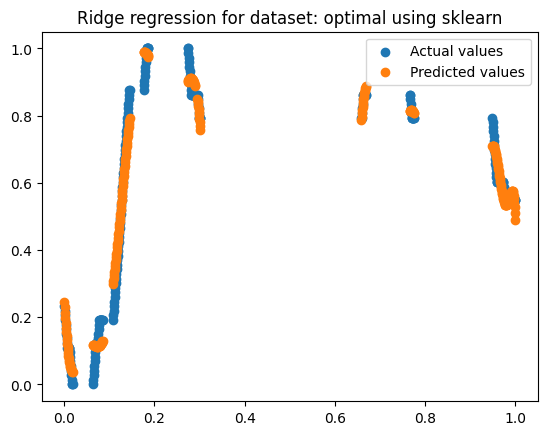

Operation time for ridge regression using sklearn:0.00077
MSE for ridge regression using sklearn: 0.0018583088498439657


In [55]:
RidgeRegressionOwn(optimal_set, "optimal")
RidgeRegression(optimal_set, "optimal")

**Conclusions** Analytical approach is faster. Sklearn model is much better fitted than analytical approach. 

### 3.3.3. Complete dataset

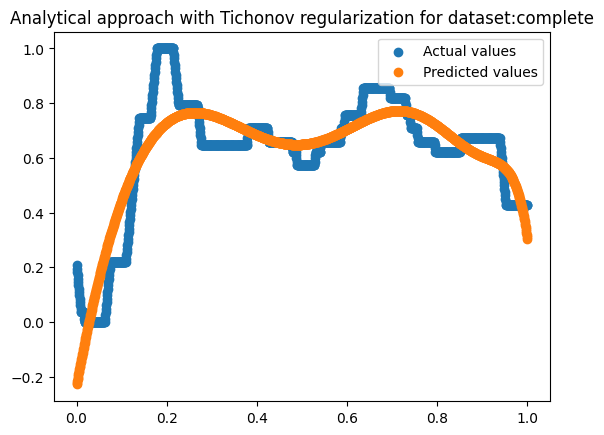

Operation time for ridge regression using analytical approach:0.00040
MSE for ridge regression using analytical approach: 0.011515413374871917


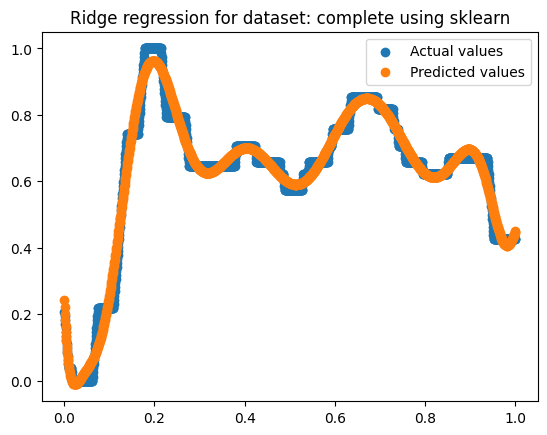

Operation time for ridge regression using sklearn:0.00119
MSE for ridge regression using sklearn: 0.0011225850559957577


In [56]:
RidgeRegressionOwn(complete_set, "complete")
RidgeRegression(complete_set, "complete")

**Conclusions** In general Ridge regression from sklearn has better results and it is better fitted than own implementation, but it is a little slower than analytical approach with tichonov regularization. 